### NYC Taxi Fare Prediction Challenge
#### CSE 519 : Data Science Fundamentals
Ritika Nevatia (112007313)

ritika.nevatia@stonybrook.edu

# Step 1: Reading the dataset

Reading the dataset and understanding what each field represents.

In [1]:
import pandas as pd
df = pd.read_csv('/Users/Shared/Work/dsf/hw2/train.csv')

In [2]:
df.shape

(55423856, 8)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB
None


In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


# Step 2: Cleaning dataset

#### Conclusion

The training data has about 55 million rows.

Most of the columns are float/integer type except the key and pickup datetime.

There are some very obvious extremes in the data when we look at the mean/min/max values of the numerical columns, as follows:
* Minimum fare_amount is negative
* Maximum fare_amount is absurd - USD 93963
* Latitudes and longitudes have a very long range of values even for a big city like NYC
* Minimum passenger_count is 0
* Maximum passenger_count is 208

## Step 2.1: Clean Fare Amount

Let's study the fare amount frequency

In [5]:
import seaborn as sns
sns.distplot(df['fare_amount'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


#### Conclusion
We realize that some fares are absurd, i.e. less than USD 3 (base fare for NYC cabs) and more than USD 500.
We'll clean this.

In [6]:
df = df[df.fare_amount>=3.0]
df = df[df.fare_amount<=500]

## Step 2.2: Clean Passenger Count

Minimum value of passenger counts as seen above is 0 - this doesn't make sense. Perhaps the taxi was dropping parcels but it's best to not risk data contamination for there are chances that this data was recorded in error.
Similarly, the maximum value of a NYC taxi is 6 passengers.

So we'll apply these restrictions and drop rows which have passengers less than 1 or more than 6.

In [7]:
df.passenger_count.value_counts(dropna=False)

1      38056631
2       8141219
5       3904012
3       2423042
4       1173803
6       1169847
0        192396
208          46
9            22
7            14
8             8
129           2
51            1
34            1
Name: passenger_count, dtype: int64

In [8]:
df = df[df.passenger_count>0]
df = df[df.passenger_count<7]

## Step 2.3: Clean duplicate data

To avoid any bias, we remove all duplicate data.

In [9]:
df.drop_duplicates()
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.486855e+07,5.486855e+07,5.486855e+07,5.486855e+07,5.486855e+07,5.486855e+07
mean,1.140599e+01,-7.252981e+01,3.993070e+01,-7.254059e+01,3.993675e+01,1.692090e+00
std,9.791473e+00,1.279479e+01,9.632379e+00,1.270911e+01,9.596615e+00,1.307679e+00
min,3.000000e+00,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,1.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073496e+01,-7.399141e+01,4.073407e+01,1.000000e+00
50%,8.500000e+00,-7.398182e+01,4.075267e+01,-7.398017e+01,4.075318e+01,1.000000e+00
75%,1.250000e+01,-7.396716e+01,4.076714e+01,-7.396376e+01,4.076811e+01,2.000000e+00
max,5.000000e+02,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,6.000000e+00


## Step 2.4: Clean Null Values

Some rows have null values, these need to be gotten rid of.

In [10]:
df = df.dropna(how = 'any', axis = 'rows')
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.486855e+07,5.486855e+07,5.486855e+07,5.486855e+07,5.486855e+07,5.486855e+07
mean,1.140599e+01,-7.252981e+01,3.993070e+01,-7.254059e+01,3.993675e+01,1.692090e+00
std,9.791473e+00,1.279479e+01,9.632379e+00,1.270911e+01,9.596615e+00,1.307679e+00
min,3.000000e+00,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,1.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073496e+01,-7.399141e+01,4.073407e+01,1.000000e+00
50%,8.500000e+00,-7.398182e+01,4.075267e+01,-7.398017e+01,4.075318e+01,1.000000e+00
75%,1.250000e+01,-7.396716e+01,4.076714e+01,-7.396376e+01,4.076811e+01,2.000000e+00
max,5.000000e+02,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,6.000000e+00


## Step 2.5: Study Test Data 

We can gather a lot of insight from test data to put ranges on the training data.

In [11]:
import numpy as np
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

test_df = pd.read_csv('/Users/Shared/Work/dsf/hw2/test.csv')
test_df['distance_miles'] = distance(test_df.pickup_latitude, test_df.pickup_longitude, test_df.dropoff_latitude, test_df.dropoff_longitude)
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2.134640
std,0.042774,0.033541,0.039072,0.035435,1.278747,2.468319
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,0.806712
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,1.377836
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2.513634
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,62.134660


#### Conclusions

Describing the test data gives us the following insights:
1. Latitute ranges are from 40.573143 to 41.709555
2. Longitude ranges are from -72.986532	to -74.263242	
3. If we calculate the euclidean distance between pickup and drop off point, the maximum value is xx miles

## Step 2.6: Clean bad latitudes and longitudes

From the above description of test data, latitudes and longitudes outside of a certain range are never asked for. To improve the model's accuracy, we can get rid of these data points.

Hence, we apply an upper and lower limit on the latitude and longitude values based on our test data above.

In [12]:
#Longitude
df = df[df.pickup_longitude>=-74.3]
df = df[df.dropoff_longitude>=-74.3]
df = df[df.dropoff_longitude<=-72.8]
df = df[df.pickup_longitude<=-72.8]

#Latitude
df = df[df.pickup_latitude>=40.4]
df = df[df.dropoff_latitude>=40.4]
df = df[df.dropoff_latitude<=41.8]
df = df[df.pickup_latitude<=41.8]

df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.372812e+07,5.372812e+07,5.372812e+07,5.372812e+07,5.372812e+07,5.372812e+07
mean,1.137676e+01,-7.397517e+01,4.075110e+01,-7.397431e+01,4.075146e+01,1.692215e+00
std,9.646981e+00,3.823226e-02,2.944705e-02,3.738884e-02,3.273068e-02,1.307575e+00
min,3.000000e+00,-7.430000e+01,4.040000e+01,-7.430000e+01,4.040000e+01,1.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073658e+01,-7.399159e+01,4.073560e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075338e+01,-7.398061e+01,4.075387e+01,1.000000e+00
75%,1.250000e+01,-7.396835e+01,4.076756e+01,-7.396540e+01,4.076840e+01,2.000000e+00
max,5.000000e+02,-7.280145e+01,4.178958e+01,-7.280482e+01,4.179935e+01,6.000000e+00


Other idea could be to clean up points which go outside the map of NYC. Open source libraries allow coordinates to be plotted on images on a map.

NYC also has water bodies/ large parks. We could further examine and clean out rows which either pickup/drop off from these locations

# Step 3: Create new features

## Step 3.1.1 : Create Distance column

As one would expect, fare is directly proportional to distance traveled. It makes sense to create this column on our training data.

Text(0.5,1,'Distance Histogram')

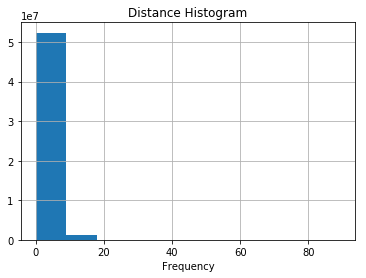

In [14]:
import matplotlib.pyplot as plt
df['distance_miles'] = distance(df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude)
df.distance_miles.hist()
plt.xlabel('Frequency')
plt.title('Distance Histogram')

## Step 3.1.2: Clean bad distance rows

Its safe to say that taxi would travel atleast 0.05 miles and less than 100 miles (exaggerated) within NYC. Data not conforming to this should be removed.

In [15]:
df = df[df.distance_miles > 0.05]
df = df[df.distance_miles < 100]
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles
count,5.302161e+07,5.302161e+07,5.302161e+07,5.302161e+07,5.302161e+07,5.302161e+07,5.302161e+07
mean,1.132863e+01,-7.397555e+01,4.075100e+01,-7.397468e+01,4.075136e+01,1.692525e+00,2.105537e+00
std,9.428193e+00,3.539938e-02,2.762060e-02,3.448389e-02,3.114249e-02,1.307702e+00,2.337850e+00
min,3.000000e+00,-7.430000e+01,4.040000e+01,-7.430000e+01,4.040000e+01,1.000000e+00,5.000107e-02
25%,6.100000e+00,-7.399229e+01,4.073662e+01,-7.399159e+01,4.073564e+01,1.000000e+00,8.055347e-01
50%,8.500000e+00,-7.398213e+01,4.075340e+01,-7.398064e+01,4.075390e+01,1.000000e+00,1.363495e+00
75%,1.250000e+01,-7.396851e+01,4.076755e+01,-7.396560e+01,4.076840e+01,2.000000e+00,2.463535e+00
max,5.000000e+02,-7.280145e+01,4.178958e+01,-7.280482e+01,4.179935e+01,6.000000e+00,8.937474e+01


A quick scatter plot will give us more insight 

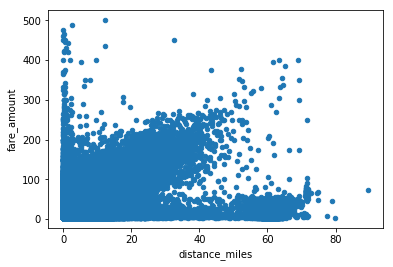

In [16]:
df.plot.scatter(x='distance_miles',y='fare_amount')

Overall it looks like a linear graph, which makes sense. Let's try to get rid of some extreme anomalies

In [17]:
df = df[~((df['fare_amount']>=300) & (df['distance_miles']<=20))]

In [18]:
df = df[~((df['fare_amount']<=100) & (df['distance_miles']>=70))]

## Step 3.2.1 : Create Day of the Week column

Traffic highly depends on the day of the week. For instance, weekdays tend to have peaker traffic than weekends. It makes sense to create such a column

## Step 3.2.2: Clean bad days of week

Days of the week which are null or other than the 7 days should be deleted!

## Step 3.3.1: Create column for fixed fares

We know that JFK to Manhattan costs $52, a fixed flat rate.

A quick google search gives us the coordinates of JFK and loosening the bounds for accomodating different gates/terminals of the airport, we can classify our rows for fixed distance fares.

In [20]:
jfk_lat_upper = 40.64
jfk_lat_lower = 40.65
jfk_lon_upper = -73.77
jfk_lon_lower = -73.78

len(df[(df['pickup_latitude']>=jfk_lat_upper) & (df['pickup_latitude']<=jfk_lat_lower) & (df['pickup_longitude']>=jfk_lon_lower) & (df['pickup_longitude']<=jfk_lon_upper)])


150571

It's a significant number of rows, so it definitely calls for a new feature!

In [21]:
df['airport_fare'] = 0
df.loc[(df['pickup_latitude']>=jfk_lat_upper) & (df['pickup_latitude']<=jfk_lat_lower) & (df['pickup_longitude']>=jfk_lon_lower) & (df['pickup_longitude']<=jfk_lon_upper), 'airport_fare'] = 1

## Step 3.4.1 : Create Hour/Minute columns

Traffic also depends on what hour of the day it is. So its crucial to create this column and study the relationship of time with fare amount.

In [22]:
df['pickup_hh'] = df.key.str.slice(11,13)
df['pickup_mm'] = df.key.str.slice(14,16)
df['pickup_hhmm'] = df["pickup_hh"] + df["pickup_mm"]
df['pickup_hh'] = df['pickup_hh'].astype(int)
df['pickup_mm'] = df['pickup_mm'].astype(int)
df['pickup_hhmm'] = df['pickup_hhmm'].astype(int)
df.head(10)
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles,airport_fare,pickup_hh,pickup_mm,pickup_hhmm
count,5.302149e+07,5.302149e+07,5.302149e+07,5.302149e+07,5.302149e+07,5.302149e+07,5.302149e+07,5.302149e+07,5.302149e+07,5.302149e+07,5.302149e+07
mean,1.132827e+01,-7.397555e+01,4.075100e+01,-7.397468e+01,4.075136e+01,1.692525e+00,2.105434e+00,2.839811e-03,1.351816e+01,2.958122e+01,1.381397e+03
std,9.422107e+00,3.538606e-02,2.761011e-02,3.448178e-02,3.114109e-02,1.307703e+00,2.336309e+00,5.321416e-02,6.515275e+00,1.732963e+01,6.517775e+02
min,3.000000e+00,-7.430000e+01,4.040000e+01,-7.430000e+01,4.040000e+01,1.000000e+00,5.000107e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.100000e+00,-7.399229e+01,4.073662e+01,-7.399159e+01,4.073564e+01,1.000000e+00,8.055346e-01,0.000000e+00,9.000000e+00,1.500000e+01,9.260000e+02
50%,8.500000e+00,-7.398213e+01,4.075340e+01,-7.398064e+01,4.075390e+01,1.000000e+00,1.363493e+00,0.000000e+00,1.400000e+01,3.000000e+01,1.440000e+03
75%,1.250000e+01,-7.396851e+01,4.076755e+01,-7.396560e+01,4.076840e+01,2.000000e+00,2.463526e+00,0.000000e+00,1.900000e+01,4.500000e+01,1.932000e+03
max,4.500000e+02,-7.280145e+01,4.178958e+01,-7.280482e+01,4.179935e+01,6.000000e+00,7.167200e+01,1.000000e+00,2.300000e+01,5.900000e+01,2.359000e+03


## Step 3.5.1: Create column to identify peak hours

First lets figure out when is peak hour from simple stats count.

Text(0.5,1,'Pickup Hour Histogram')

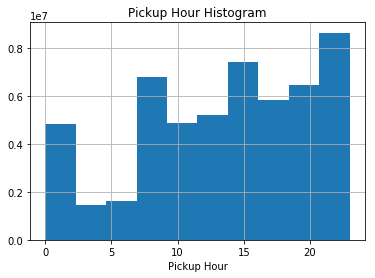

In [23]:
df.pickup_hh.hist()
plt.xlabel('Pickup Hour')
plt.title('Pickup Hour Histogram')

In [24]:
df.groupby('pickup_hh').pickup_hh.count()

pickup_hh
0     2098903
1     1551580
2     1155180
3      844353
4      609771
5      513135
6     1084673
7     1909202
8     2410658
9     2480511
10    2393629
11    2469638
12    2608492
13    2591786
14    2669043
15    2545974
16    2183322
17    2626962
18    3196567
19    3319759
20    3128450
21    3042581
22    2959326
23    2627992
Name: pickup_hh, dtype: int64

Let's try to make peak and super peak hours of the day based on this distribution of data:
Let peak ~ Greater than 2400000 data rows
Let super peak ~ Greater than 3000000 data rows

In [25]:
peak_hours = [8,9,10,11,13,15,12,14,17,22,23]
super_peak_hours = [18,19,20,21]
df['peak'] = 1
df.loc[df['pickup_hh'].isin(peak_hours), 'peak'] = 2
df.loc[df['pickup_hh'].isin(super_peak_hours), 'peak'] = 3
df.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles,airport_fare,pickup_hh,pickup_mm,pickup_hhmm,peak
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.640487,0,17,26,1726,2
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.250670,0,16,52,1652,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863411,0,0,35,35,1
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.739386,0,4,30,430,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.242218,0,7,51,751,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,2.353281,0,9,50,950,2
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,0.966733,0,20,35,2035,3
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,2.582073,0,17,22,1722,2
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,0.778722,0,13,10,1310,2
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,1.770676,0,1,11,111,1


# Step 4.1: Finding correlations

Let's try to find pearson correlations between all columns to find our best features for the model.

In [26]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles,airport_fare,pickup_hh,pickup_mm,pickup_hhmm,peak
fare_amount,1.000000,0.428928,-0.212468,0.324062,-0.169025,0.015024,0.859417,0.181582,-0.017555,-0.007717,-0.017754,-0.037269
pickup_longitude,0.428928,1.000000,0.027260,0.272095,0.059762,0.001040,0.483353,0.299545,0.019702,-0.001698,0.019650,0.006057
pickup_latitude,-0.212468,0.027260,1.000000,0.066146,0.395898,-0.008912,-0.173940,-0.203861,0.026255,-0.000098,0.026243,0.039755
dropoff_longitude,0.324062,0.272095,0.066146,1.000000,0.167123,-0.000980,0.384622,0.065618,-0.047331,-0.003909,-0.047417,-0.064895
dropoff_latitude,-0.169025,0.059762,0.395898,0.167123,1.000000,-0.004826,-0.128190,-0.040694,0.018792,0.001796,0.018832,0.020958
passenger_count,0.015024,0.001040,-0.008912,-0.000980,-0.004826,1.000000,0.009396,0.002130,0.016664,-0.000863,0.016635,0.007914
distance_miles,0.859417,0.483353,-0.173940,0.384622,-0.128190,0.009396,1.000000,0.200800,-0.029224,-0.006735,-0.029392,-0.056109
airport_fare,0.181582,0.299545,-0.203861,0.065618,-0.040694,0.002130,0.200800,1.000000,0.000898,-0.000253,0.000891,-0.004040
pickup_hh,-0.017555,0.019702,0.026255,-0.047331,0.018792,0.016664,-0.029224,0.000898,1.000000,0.001132,0.999646,0.725921
pickup_mm,-0.007717,-0.001698,-0.000098,-0.003909,0.001796,-0.000863,-0.006735,-0.000253,0.001132,1.000000,0.027720,0.002852


#### Conclusion

There is a strong notable correlation between the following with respect to fare_amount (in descending order):

* distance_miles
* pickup_longitude 
* dropoff_longitude 
* pickup_latitute
* airport_fare 
* dropoff_latitude 

# Step 4.2: Plotting correlations

## Step 4.2.1 : Distance vs Fare

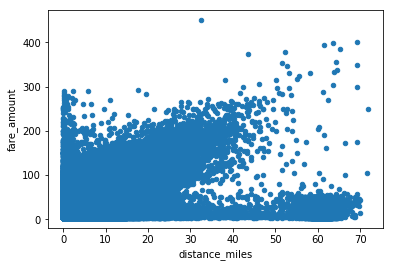

In [27]:
df.plot.scatter(x='distance_miles',y='fare_amount')

#### Conclusion

We see that as distance increases, fare increases - an expected relationship given the nature of taxi fares. We however see two interesting observations outside the linear fit:
1. For above 35 miles of distance covered, the fare amount is around 50 USD. This perhaps explains the fixed fare from JFK airport to Manhattan.
2. For distances under 10 miles, there are certain plot points above 100 USD which may seem absurd. However given the traffic of the city on a peak hour and a peak day, this might not be far fetched.

## Step 4.2.2 : Pickup Time vs Distance

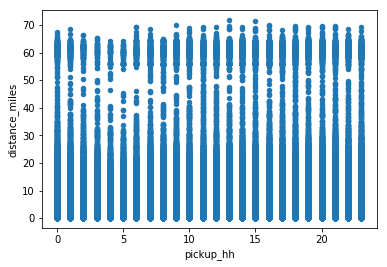

In [28]:
df.plot.scatter(x='pickup_hh',y='distance_miles')

#### Conclusion
The graph doesn't tell us much, since there seems to be a uniform distribution of data for all hours of the day and the miles covered. However, the following comments can be made:
1. Since there's less data for extremely off-peak hours like 5 am, the data points are more isolated. 
2. Usually around the off-peak hours, there is less long distance travel. This can be seem with the obvious gaps in the graph at 3-6 am on X axis and 40-50 miles on the Y axis.
3. Being one of the busiest airports in the world, distances of around 35 miles (JFK to Manhattan) seem to be present at all hours.


## Step 4.2.3 : Pickup Time vs Fare

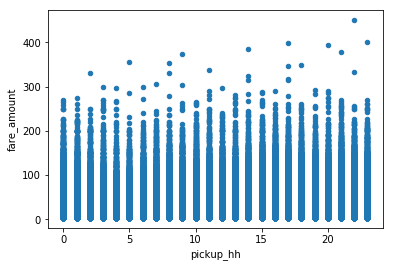

In [29]:
df.plot.scatter(x='pickup_hh',y='fare_amount')

#### Conclusion

1. The densely populated areas of the graph, almost seem uniform.
2. However around 3-5 AM, there are no/few points for high fare amounts. This can be explained since there should practically be no traffic, thus resulting in lower fares.
3. There are higher frequency of high fare amounts at nights, thus explaining the late night charge phenomenon.

## Step 4.2.3 : Pickup Time vs Number of Passengers

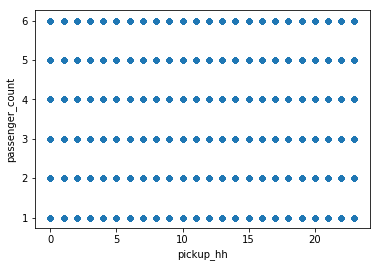

In [30]:
df.plot.scatter(x='pickup_hh',y='passenger_count')

#### Conclusion

This graph tells us that there is enough data in the dataset because there is a dense point for every hour of the day and the number of passengers travelling. This confirms we don't have a biased dataset but rather a well-distributed one.

## Step 4.2.4 : Pickup Time - Histogram

Text(0.5,1,'Pickup Time Histogram')

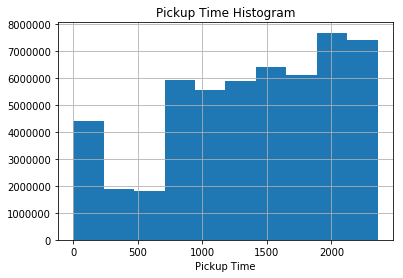

In [32]:
df.pickup_hhmm.hist()
plt.xlabel('Pickup Time')
plt.title('Pickup Time Histogram')

#### Conclusion

This histogram allows us to predict busier times of the day. We are able to make the following comments:
1. Fewer people take taxis from 2:30 AM to 6 AM
2. A very high number of taxis are used from 7 PM till midnight. This allows us to identify these hours are super peak hours.
3. A considerably large number of taxis are taken from 8 AM to 11 AM and around 2 PM to 4 PM. This allows us to identify our peak hours.

# Step 5.1 Baseline Prediction Model

## Linear Regression

In [33]:
from sklearn import linear_model
X = df[['peak','distance_miles','pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','airport_fare']]
Y = df['fare_amount']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

intercept = regr.intercept_
coefficients = regr.coef_

Intercept: 
 2172.100117993176
Coefficients: 
 [  0.17447503   3.33370428   8.85096023 -18.49860614   2.63679956
 -13.85206052  -1.39137148]


### Preparing test data for fitting model

In [34]:
test_df['pickup_hh'] = test_df.key.str.slice(11,13)
test_df['pickup_hh'] = test_df['pickup_hh'].astype(int)
test_df['peak'] = 1
test_df.loc[test_df['pickup_hh'].isin(peak_hours), 'peak'] = 2
test_df.loc[test_df['pickup_hh'].isin(super_peak_hours), 'peak'] = 3

#airport_fare column
test_df['airport_fare'] = 0
test_df.loc[(test_df['pickup_latitude']>=jfk_lat_upper) & (test_df['pickup_latitude']<=jfk_lat_lower) & (test_df['pickup_longitude']>=jfk_lon_lower) & (test_df['pickup_longitude']<=jfk_lon_upper), 'airport_fare'] = 1


In [35]:
#day_of_week column
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])
test_df['day_of_week'] = test_df['pickup_datetime'].dt.dayofweek

In [36]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles,pickup_hh,peak,airport_fare,day_of_week
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,1.443607,13,2,0,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,1.507044,13,2,0,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.384398,11,2,0,5
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.218529,21,3,0,5
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,3.347514,21,3,0,5


### Predicting..

In [37]:
test_df['fare_amount'] = intercept + (coefficients[0]*test_df['peak']) + (coefficients[1]*test_df['distance_miles']) + (coefficients[2]*test_df['pickup_longitude']) + (coefficients[3]*test_df['pickup_latitude']) + (coefficients[4]*test_df['dropoff_longitude']) + (coefficients[5]*test_df['dropoff_latitude']) + (coefficients[6]*test_df['airport_fare'])


In [38]:
test_df.head(10)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles,pickup_hh,peak,airport_fare,day_of_week,fare_amount
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,1.443607,13,2,0,1,8.992855
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,1.507044,13,2,0,1,9.924399
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.384398,11,2,0,5,5.585147
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.218529,21,3,0,5,8.141754
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,3.347514,21,3,0,5,15.071366
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,2.002399,21,3,0,5,11.165491
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.577627,12,2,0,3,5.829916
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,13.384399,12,2,1,3,51.086359
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,2.407168,12,2,0,3,12.844332
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,0.683380,15,2,0,1,6.089357


In [39]:
submit_df = test_df[['key','fare_amount']]

In [40]:
submit_df.to_csv('output_linear.csv', encoding='utf-8', index=False)

# Step 5.2 Other Models

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor as rf

random_forest = rf(n_estimators = 5, random_state = 2, max_depth = 20)
random_forest.fit(df[['peak','distance_miles','pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','airport_fare']],df['fare_amount'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [42]:
test_df['fare_amount_rf'] = random_forest.predict(test_df[['peak','distance_miles','pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','airport_fare']])
submit_df_rf = test_df[['key','fare_amount']]
submit_df_rf.to_csv('output_rf.csv', encoding='utf-8', index=False)